<a href="https://colab.research.google.com/github/gani88/ML-DataScience/blob/main/Dicoding_ML_StudyCase_Overfitting%26Underfitting_1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overfitting and Underfitting Study Case

## Import Library

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Load Dataset for Overfitting Problem

In [2]:
# Load the California Housing dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [3]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
y.head()

,0
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [5]:
# Data Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [7]:
# Model Init
model = DecisionTreeRegressor(max_depth=50, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Create prediction for data training and testing
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## Detect Overfitting

To detect overfitting, we need to compare model performance on training and testing data. Overfitting happen when model works very well on training data, but shows bad performance on testing data because model is too compatible with training data.

### 1. Evaluate Performance on Training and Testing Data

We can use MSE for data training and data testing. MSE is metric to calculate different mean squared between predicted value and true value. Lower MSE value, is better for model to predict data.

With this method, we can identify whether the model is overfitting or not. Good model should have balance relative of MSE between data training and testing. If it has significant different, maybe it need to consider to simplify model or using regularization technique to reduce overfitting.

In [8]:
# Calculate MSE for training and testing
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Training MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

Training MSE: 9.904697258622977e-32
Test MSE: 0.5265256772490148


As observed, there is a significant difference between the training and testing MSE, indicating overfitting. Overfitting occurs when a model becomes too tailored to the training data, losing its ability to generalize well to new, unseen data.

### 2. Learning Curve

Another way to detect overfitting is by analyzing the Learning Curve. This curve helps us understand whether the model is overfitting or underfitting. Overfitting is indicated when the training error is very low, but the validation error remains high or does not decrease even as the training data increases.

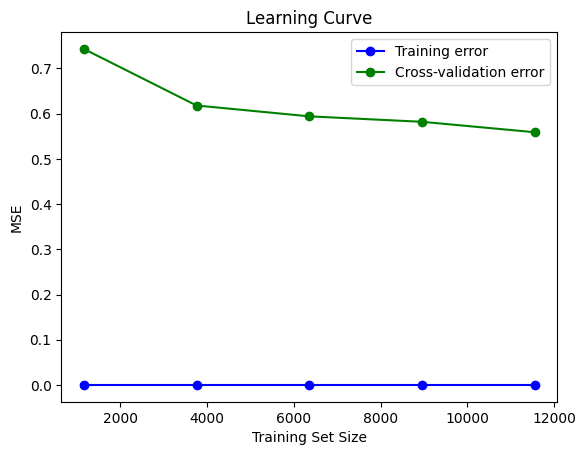

In [9]:
# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Calculate mean and standard deviation
train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)

# Learning curve
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training error")
plt.plot(train_sizes, test_mean, 'o-', color="green", label="Cross-validation error")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("MSE")
plt.legend()
plt.show()

The learning curve reveals a significant gap between the training error and the cross-validation error, which is a clear indication of overfitting.

## Handle Overfitting

### 1. Cross-Validation
One effective method to address overfitting is cross-validation. This technique evaluates how well the model generalizes to new data by splitting the training dataset into multiple subsets. The model is trained and tested on different subsets in rotation, providing a more comprehensive view of its performance. Cross-validation helps reduce the risk of overfitting by ensuring the model is not overly reliant on a specific subset of the data.

In [10]:
# Using 5 fold cross-validation
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print(f'Cross validation MSE: {-cross_val_scores.mean()}')

Cross validation MSE: 0.5562691658603186


After applying cross-validation, we obtained a cross-validation MSE of 0.556. Previously, the model showed a training MSE of 9.90 × 10⁻³² and a testing MSE of 0.562. These results indicate that before cross-validation, the model was overfitting—it performed nearly perfectly on the training data but struggled to maintain similar performance on the testing data.

With cross-validation, the model's performance is evaluated more thoroughly and fairly by splitting the data into multiple subsets and testing it alternately. The Cross-Validation MSE, which is close to the Test MSE (0.556 vs. 0.526), shows that the model is more consistent and better at avoiding overfitting. This means the model is now more reliable at predicting new data and remains stable when tested with different subsets.

However, despite the improvement, there is still a significant gap between the Cross-Validation MSE and the very low Training MSE. This suggests that the model is not fully optimized and may still be overfitting to some extent.

### 2. Regularization  (Max Depth, Min Samples Split, Min Samples Leaf)

Applying regularization by reducing the decision tree depth to 5 helps simplify the model, preventing it from becoming overly complex and improving its ability to generalize to new data.

In [11]:
# Create the model
model_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
model_reg.fit(X_train, y_train)

# Evaluate training and testing data
y_train_pred_reg = model_reg.predict(X_train)
y_test_pred_reg = model_reg.predict(X_test)

# Calculate the MSE
train_mse_reg = mean_squared_error(y_train, y_train_pred_reg)
test_mse_reg = mean_squared_error(y_test, y_test_pred_reg)

print(f'Training MSE (After Regularization): {train_mse_reg}')
print(f'Testing MSE (After Regularization): {test_mse_reg}')

Training MSE (After Regularization): 0.4928096322147045
Testing MSE (After Regularization): 0.5210801561811793


The results show significant improvement compared to before, with the gap between the training MSE and testing MSE becoming much smaller. This indicates that the model is now more balanced, focusing less on just the training data and performing more consistently on the testing data.

### 3. Pruning

Another method is Pruning using the Cost Complexity Pruning technique, controlled by the ccp_alpha parameter. This technique prunes less important branches of the decision tree. A larger ccp_alpha value results in more branches being pruned, simplifying the model further.

In [12]:
# Using ccp_alpha for pruning
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Train model with pruning
model_pruned = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alphas[-2])
model_pruned.fit(X_train, y_train)

# Make a prediction
y_train_pred_pruned = model_pruned.predict(X_train)
y_test_pred_pruned = model_pruned.predict(X_test)

# Calculate MSE
train_mse_pruned = mean_squared_error(y_train, y_train_pred_pruned)
test_mse_pruned = mean_squared_error(y_test, y_test_pred_pruned)

print(f"Pruned Model Training MSE: {train_mse_pruned}")
print(f"Pruned Model Test MSE: {test_mse_pruned}")

Pruned Model Training MSE: 0.9189620181001872
Pruned Model Test MSE: 0.9194598144703808


The results are better compared to the decision tree without regularization. The MSE is now more stable between the training and testing data, which means the model can generalize new data more effectively and consistently.

### 4. Data Augmentation


Data augmentation is a technique used to enhance the quality and performance of a model by creating additional variations from the existing data.

In this case, we apply augmentation by adding a small amount of noise. Noise refers to random disturbances in the training data. While not significant, this added variation can help make the training data more diverse and improve the model's ability to generalize.

In [13]:
# Add little noise to data
X_train_aug = X_train + np.random.normal(0, 0.1, X_train.shape)

# Retrain model with augmented data
model_aug = DecisionTreeRegressor(max_depth=10, random_state=42)
model_aug.fit(X_train_aug, y_train)

# Create prediction
y_train_pred_aug = model_aug.predict(X_train_aug)
y_test_pred_aug = model_aug.predict(X_test)

# MSE
train_mse_aug = mean_squared_error(y_train, y_train_pred_aug)
test_mse_aug = mean_squared_error(y_test, y_test_pred_aug)

print(f'Augmented Data Training MSE: {train_mse_aug}')
print(f'Augmented Data Test MSE: {test_mse_aug}')


Augmented Data Training MSE: 0.3099956869150689
Augmented Data Test MSE: 0.5033724082007321


### 5. Dropout

Dropout is a regularization technique commonly used to reduce overfitting in machine learning models, particularly in neural networks. It works by randomly "dropping out" (disabling) some neurons during training, forcing the model to rely on a broader set of features and become more robust.

However, for a this case, Decision Tree model, dropout cannot be directly applied. Instead, we use a similar approach with Random Forests. Random Forest is an ensemble method that combines multiple decision trees to improve model performance and reduce overfitting by averaging their predictions.

In [15]:
from sklearn.ensemble import RandomForestRegressor

# Init Random Forest with n_estimator
model_rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train model
model_rf.fit(X_train, y_train)

# Create a prediction
y_train_pred_rf = model_rf.predict(X_train)
y_test_pred_rf = model_rf.predict(X_test)

# Calculate MSE
train_mse_rf = mean_squared_error(y_train_pred_rf, y_train)
test_mse_rf = mean_squared_error(y_test_pred_rf, y_test)

print(f"Random Forest Training MSE : {train_mse_rf}")
print(f"Random Forest Testing MSE : {test_mse_rf}")

Random Forest Training MSE : 0.1694494883912745
Random Forest Testing MSE : 0.2944600120852388
